<a href="https://colab.research.google.com/github/SachinBiswas7/Machine-Learning/blob/main/Support%20Vector%20Machine%20/Prediction_of_default_payment_of_credit_card_client_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
df=pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
 x = df.drop('default.payment.next.month',axis = 1)
 x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
 y = df[['default.payment.next.month']]
 y

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
X = scaler.transform(x)
print(X)  #Scaled values

[[0.00000000e+00 1.01010101e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.33344445e-05 1.11111111e-01 1.00000000e+00 ... 1.61030596e-03
  0.00000000e+00 3.78310691e-03]
 [6.66688890e-05 8.08080808e-02 1.00000000e+00 ... 1.61030596e-03
  2.34450647e-03 9.45776729e-03]
 ...
 [9.99933331e-01 2.02020202e-02 0.00000000e+00 ... 6.76328502e-03
  4.68901294e-03 5.86381572e-03]
 [9.99966666e-01 7.07070707e-02 0.00000000e+00 ... 3.10144928e-03
  1.24174441e-01 3.41236244e-03]
 [1.00000000e+00 4.04040404e-02 0.00000000e+00 ... 1.61030596e-03
  2.34450647e-03 1.89155346e-03]]


In [ ]:
y = y.squeeze()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X= pca.fit_transform(X)
X.shape

(30000, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

[0] Logistic Regression Training Accuracy: 0.81
[1] K Nearest Neighbor Training Accuracy: 0.84
[2] Decision Tree Classifier Training Accuracy: 1.00
[3] Gaussian Naive Bayes Training Accuracy: 0.73
[4] Random Forest Classifier Training Accuracy: 0.98
[5] Support Vector Machine (Linear Classifier) Training Accuracy: 0.81
Confusion Matrix for Logistic Regression:
[[4531  117]
 [1018  334]]
Logistic Regression Testing Accuracy = 0.8108
Logistic Regression Precision = 0.7406
Logistic Regression Recall = 0.2470
Logistic Regression F1 Score = 0.3705



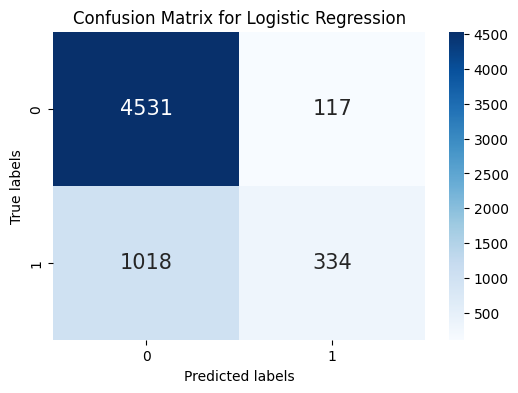

Confusion Matrix for K Nearest Neighbor:
[[4272  376]
 [ 883  469]]
K Nearest Neighbor Testing Accuracy = 0.7902
K Nearest Neighbor Precision = 0.5550
K Nearest Neighbor Recall = 0.3469
K Nearest Neighbor F1 Score = 0.4269



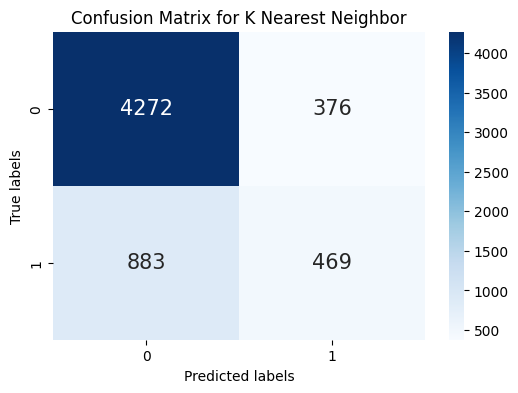

Confusion Matrix for Decision Tree Classifier:
[[3800  848]
 [ 799  553]]
Decision Tree Classifier Testing Accuracy = 0.7255
Decision Tree Classifier Precision = 0.3947
Decision Tree Classifier Recall = 0.4090
Decision Tree Classifier F1 Score = 0.4017



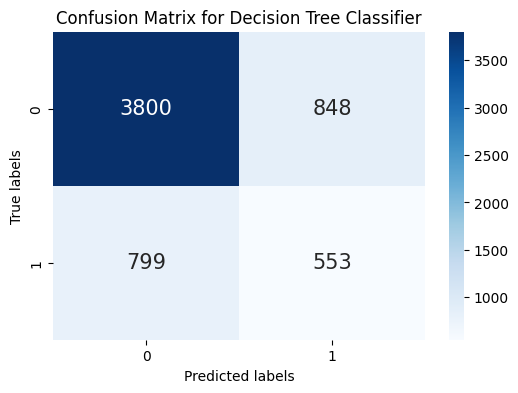

Confusion Matrix for Gaussian Naive Bayes:
[[3497 1151]
 [ 489  863]]
Gaussian Naive Bayes Testing Accuracy = 0.7267
Gaussian Naive Bayes Precision = 0.4285
Gaussian Naive Bayes Recall = 0.6383
Gaussian Naive Bayes F1 Score = 0.5128



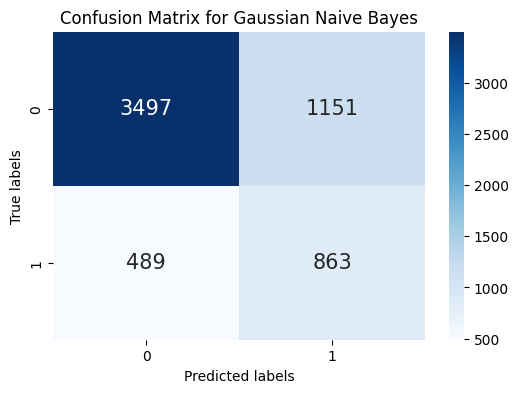

Confusion Matrix for Random Forest Classifier:
[[4400  248]
 [ 918  434]]
Random Forest Classifier Testing Accuracy = 0.8057
Random Forest Classifier Precision = 0.6364
Random Forest Classifier Recall = 0.3210
Random Forest Classifier F1 Score = 0.4267



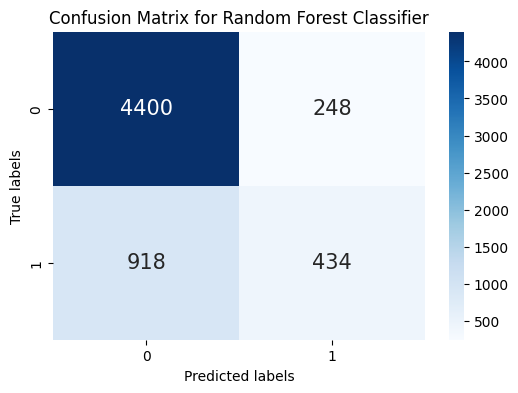

Confusion Matrix for Support Vector Machine (Linear Classifier):
[[4528  120]
 [1027  325]]
Support Vector Machine (Linear Classifier) Testing Accuracy = 0.8088
Support Vector Machine (Linear Classifier) Precision = 0.7303
Support Vector Machine (Linear Classifier) Recall = 0.2404
Support Vector Machine (Linear Classifier) F1 Score = 0.3617



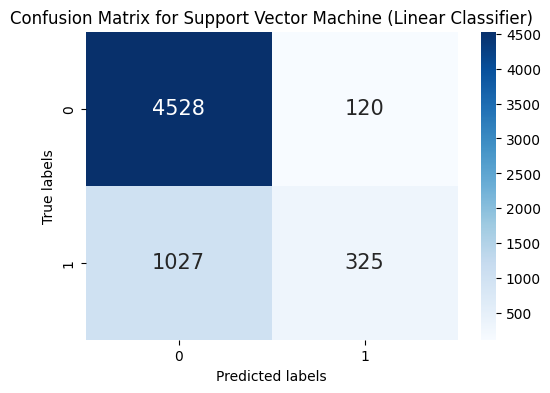

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

def models(X_train, y_train):
    # Import necessary libraries for different classifiers
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC

    # Ensure y_train is the correct shape
    y_train = y_train.ravel()

    # Initialize all models with their respective hyperparameters
    log = LogisticRegression(random_state=0, max_iter=1000)
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    gauss = GaussianNB()
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    svc_lin = SVC(kernel='linear', random_state=0)

    # List of all models
    models = [log, knn, tree, gauss, forest, svc_lin]
    # Corresponding names of the models
    model_names = [
        'Logistic Regression',
        'K Nearest Neighbor',
        'Decision Tree Classifier',
        'Gaussian Naive Bayes',
        'Random Forest Classifier',
        'Support Vector Machine (Linear Classifier)'
    ]

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train each model using the training data
    for model in models:
        model.fit(X_train_scaled, y_train)

    # Print the training accuracy for each model
    for i, model in enumerate(models):
        print(f'[{i}] {model_names[i]} Training Accuracy: {model.score(X_train_scaled, y_train):.2f}')

    return models, model_names, scaler

# Ensure that mdl, model_names, and scaler are correctly retrieved by calling the models function
mdl, model_names, scaler = models(X_train, y_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Test each model and print the results
for i, model in enumerate(mdl):
    try:
        # Predict the test set results
        y_pred = model.predict(X_test_scaled)

        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        # Calculate recall score
        recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
        # Calculate precision score
        precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

        # Calculate accuracy
        accuracy = (cm[0][0] + cm[1][1]) / cm.sum()

        # Print the confusion matrix and other metrics
        print(f'Confusion Matrix for {model_names[i]}:')
        print(cm)
        print(f'{model_names[i]} Testing Accuracy = {accuracy:.4f}')
        print(f'{model_names[i]} Precision = {precision:.4f}')
        print(f'{model_names[i]} Recall = {recall:.4f}')
        print(f'{model_names[i]} F1 Score = {f1:.4f}')
        print()  # Print a new line for better readability

        # Plot the heatmap of the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15})
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix for {model_names[i]}')
        plt.show()

    except Exception as e:
        # Print any errors encountered during the process
        print(f'Error with {model_names[i]} - Model[{i}]: {e}')
